In [12]:
import json
import numpy as np

path = "../tweet_data/"

files = ["tweets_#gohawks.txt", "tweets_#gopatriots.txt", \
        "tweets_#nfl.txt", "tweets_#patriots.txt", \
        "tweets_#sb49.txt", "tweets_#superbowl.txt"]

for i, fl in enumerate(files):
    print "files[" + str(i) + "] => " + fl

files[0] => tweets_#gohawks.txt
files[1] => tweets_#gopatriots.txt
files[2] => tweets_#nfl.txt
files[3] => tweets_#patriots.txt
files[4] => tweets_#sb49.txt
files[5] => tweets_#superbowl.txt


In [13]:
# the extracted data contains
# 0. the followers number 1. the favourite_count 2. the citation date 
# 3. the length of the title 4. the number of the twitters
def load_file(file):
    '''
    load the time, follows, and retweets
    '''
    result = []
    time_min = -1
    for line in open(path + file, 'r') :
        tmp = []
        a = json.loads(line)
        tmp.append(a['author']['followers'])
        tmp.append(a['tweet']['user']['favourites_count'])
        tmp.append(a['citation_date'])
        if time_min > a['citation_date'] or time_min == -1:
            time_min = a['citation_date']
        tmp.append(len(a['title']))
        result.append(tmp)
    return time_min, result

In [14]:
time_min, superbowl = load_file(files[0])

In [15]:
# process the time
def pro_date(date, time_min):
    time_min = time_min // 3600
    return date // 3600 - time_min

In [16]:
# process the data
max_date = 0
for p in superbowl:
    p[2] = pro_date(p[2], time_min)
    p.append(1)
    max_date = max(max_date, p[2])

In [17]:
# count the data and get the trainset
train_set = []
for i in range(max_date + 1):
    train_set.append([0] * 5)
    
for p in superbowl:
    x = train_set[p[2]]
    x[2] = p[2]
    for i in [0, 1, 3, 4]:
        x[i] += p[i]

In [18]:
target = []
for i, v in enumerate(train_set[:-1]):
    target.append(train_set[i + 1][4])

train_set = train_set[:-1]

In [19]:
print train_set[0]

[24989.0, 81313, 0, 2565, 30]


In [20]:
from sklearn import linear_model

lr = linear_model.LinearRegression().fit(train_set, target)
predict = lr.predict(train_set)

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_fit_actual(target, predict):
    fig, ax = plt.subplots()
    area = np.pi * (4)**2/4
    ax.scatter(target, predict, s = area)
    ax.plot([min(target), max(target)], [min(target), max(target)], 'k--', lw = 1)
    ax.set_xlabel('Measured size', fontsize = 20)
    ax.set_ylabel('Predicted size', fontsize = 20)
    plt.title('Fitted values vs. Actual values', fontsize = 20)

    print "Fitted values vs. Actual values:"
    plt.show()

Fitted values vs. Actual values:


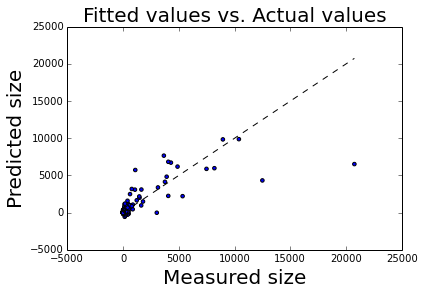

In [25]:
plot_fit_actual(target, predict)

In [23]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

print 'R-squared', r2_score(target, predict)

R-squared 0.620492755788223


In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

x = train_set
y = target
lm = sm.OLS(y, x).fit()
# 0. the followers number 1. the favourite_count 2. the citation date 
# 3. the length of the title 4. the number of the twitters
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     204.9
Date:                Sat, 10 Mar 2018   Prob (F-statistic):          5.01e-125
Time:                        18:15:29   Log-Likelihood:                -4702.0
No. Observations:                 578   AIC:                             9414.
Df Residuals:                     573   BIC:                             9436.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0002   4.92e-05     -4.466      0.0